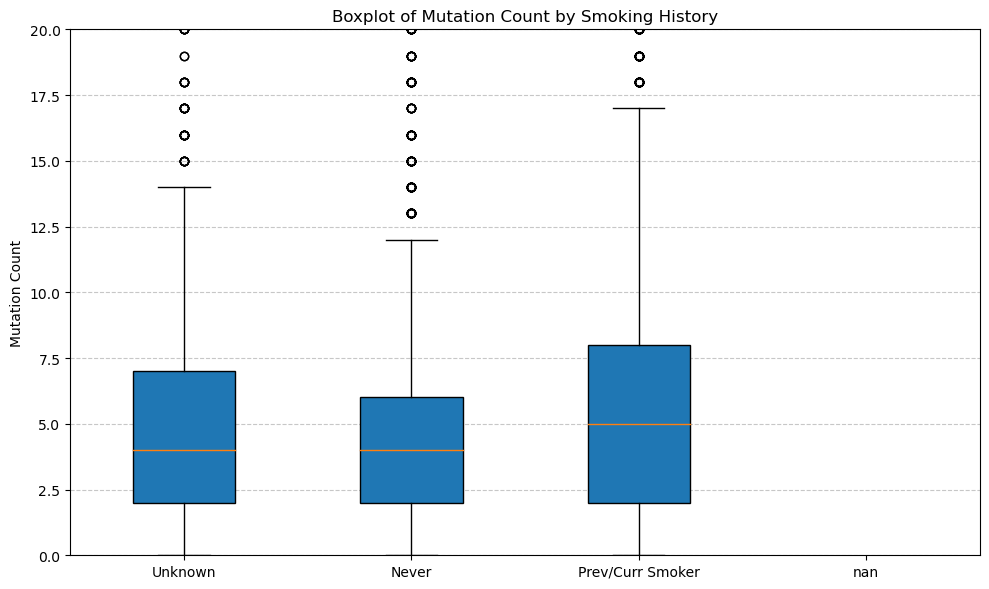

In [5]:
# Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
data_path = "C:\\Users\\adler\\TP53_NEW\\msk_impact_2017_clinical_data.csv"
data = pd.read_csv(data_path)

# Extract unique smoking categories
smoking_labels = data['Smoking History'].unique()

# Plotting boxplots for "Mutation Count" based on "Smoking History"
plt.figure(figsize=(10, 6))
plt.boxplot([data[data['Smoking History'] == category]['Mutation Count'] for category in smoking_labels], 
            vert=True, patch_artist=True, labels=smoking_labels)

# Adjust y-axis limits to zoom in on the boxes
plt.ylim(0, 20)  # Adjust the upper limit as needed

plt.ylabel('Mutation Count')
plt.title('Boxplot of Mutation Count by Smoking History')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [9]:
import pandas as pd
import scipy.stats as stats

# Load the data
data_path = "C:\\Users\\adler\\TP53_NEW\\msk_impact_2017_clinical_data.csv"
data = pd.read_csv(data_path)

# Preprocessing
data['Smoking History'] = data['Smoking History'].map({
    'Never': 'Never',
    'Current reformed smoker for > or = 15 years': 'Prev/Curr Smoker',
    'Current reformed smoker for < or = 15 years': 'Prev/Curr Smoker',
    'Current smoker': 'Prev/Curr Smoker',
    'Unknown': 'Unknown',
    'nan': 'Unknown'
})

# Extract mutation counts for each smoking category
never_smokers = data[data['Smoking History'] == 'Never']['Mutation Count']
prev_curr_smokers = data[data['Smoking History'] == 'Prev/Curr Smoker']['Mutation Count']
unknown_smokers = data[data['Smoking History'] == 'Unknown']['Mutation Count']

# Conducting the ANOVA test
f_statistic, p_value = stats.f_oneway(never_smokers, prev_curr_smokers, unknown_smokers)

print("F-statistic:", f_statistic)
print("P-value:", p_value)


F-statistic: nan
P-value: nan


C:\Users\adler\anaconda3\Lib\site-packages\scipy\stats\_stats_py.py:3861: DegenerateDataWarning: at least one input has length 0
  warnings.warn(stats.DegenerateDataWarning('at least one input '


In [10]:
print("Never Smokers:", len(never_smokers))
print("Prev/Curr Smokers:", len(prev_curr_smokers))
print("Unknown Smokers:", len(unknown_smokers))


Never Smokers: 4734
Prev/Curr Smokers: 0
Unknown Smokers: 1844


In [11]:
# Check the unique values and their counts in the "Smoking History" column
smoking_history_counts = data['Smoking History'].value_counts()
print(smoking_history_counts)


Never      4734
Unknown    1844
Name: Smoking History, dtype: int64


In [12]:
# Load the original data without any preprocessing
data_original = pd.read_csv("C:\\Users\\adler\\TP53_NEW\\msk_impact_2017_clinical_data.csv")

# Check the unique values in the original "Smoking History" column
original_smoking_values = data_original['Smoking History'].value_counts()
print(original_smoking_values)


Never               4734
Prev/Curr Smoker    4365
Unknown             1844
Name: Smoking History, dtype: int64


In [13]:
# Corrected preprocessing
data['Smoking History'] = data['Smoking History'].map({
    'Never': 'Never',
    'Current reformed smoker for > or = 15 years': 'Prev/Curr Smoker',
    'Current reformed smoker for < or = 15 years': 'Prev/Curr Smoker',
    'Current smoker': 'Prev/Curr Smoker',
    'Prev/Curr Smoker': 'Prev/Curr Smoker',  # Adding this line to account for already processed values
    'Unknown': 'Unknown'
})

# Filter the data for each category
never_smokers = data[data['Smoking History'] == 'Never']['Mutation Count']
prev_curr_smokers = data[data['Smoking History'] == 'Prev/Curr Smoker']['Mutation Count']
unknown_smokers = data[data['Smoking History'] == 'Unknown']['Mutation Count']

print("Never Smokers:", len(never_smokers))
print("Prev/Curr Smokers:", len(prev_curr_smokers))
print("Unknown Smokers:", len(unknown_smokers))


Never Smokers: 4734
Prev/Curr Smokers: 0
Unknown Smokers: 1844


In [14]:
# Filter the data directly based on original categories
never_smokers = data[data['Smoking History'] == 'Never']['Mutation Count']

# Combine all categories that should fall under "Prev/Curr Smoker"
prev_curr_smokers = data[data['Smoking History'].isin(['Current reformed smoker for > or = 15 years', 
                                                      'Current reformed smoker for < or = 15 years', 
                                                      'Current smoker', 
                                                      'Prev/Curr Smoker'])]['Mutation Count']

unknown_smokers = data[data['Smoking History'] == 'Unknown']['Mutation Count']

print("Never Smokers:", len(never_smokers))
print("Prev/Curr Smokers:", len(prev_curr_smokers))
print("Unknown Smokers:", len(unknown_smokers))


Never Smokers: 4734
Prev/Curr Smokers: 0
Unknown Smokers: 1844


In [15]:
# Directly filter the dataset for 'Prev/Curr Smoker'
prev_curr_smokers_direct = data[data['Smoking History'] == 'Prev/Curr Smoker']['Mutation Count']

print("Direct Prev/Curr Smokers Count:", len(prev_curr_smokers_direct))


Direct Prev/Curr Smokers Count: 0


In [16]:
# Check the unique values and their counts in the "Smoking History" column after preprocessing
current_smoking_values = data['Smoking History'].value_counts()
print(current_smoking_values)



Never      4734
Unknown    1844
Name: Smoking History, dtype: int64


In [17]:
# Re-load the original data without any preprocessing
data_original = pd.read_csv("C:\\Users\\adler\\TP53_NEW\\msk_impact_2017_clinical_data.csv")

# Check the unique values in the original "Smoking History" column
original_smoking_values = data_original['Smoking History'].value_counts()
print(original_smoking_values)


Never               4734
Prev/Curr Smoker    4365
Unknown             1844
Name: Smoking History, dtype: int64


In [18]:
# Directly filter the dataset for each category without any additional preprocessing
never_smokers_direct = data_original[data_original['Smoking History'] == 'Never']['Mutation Count']
prev_curr_smokers_direct = data_original[data_original['Smoking History'] == 'Prev/Curr Smoker']['Mutation Count']
unknown_smokers_direct = data_original[data_original['Smoking History'] == 'Unknown']['Mutation Count']

print("Never Smokers:", len(never_smokers_direct))
print("Prev/Curr Smokers:", len(prev_curr_smokers_direct))
print("Unknown Smokers:", len(unknown_smokers_direct))


Never Smokers: 4734
Prev/Curr Smokers: 4365
Unknown Smokers: 1844


In [19]:
import scipy.stats as stats

# Conduct the ANOVA test
f_statistic, p_value = stats.f_oneway(never_smokers_direct, prev_curr_smokers_direct, unknown_smokers_direct)

print("F-statistic:", f_statistic)
print("P-value:", p_value)


F-statistic: 17.581420077520892
P-value: 2.3808437957138278e-08


In [21]:
# Display the column names of the dataset
print(data.columns)


Index(['Patientid', 'Cancer Type', 'Cancer Type Detailed', 'DNA Input',
       'Fraction Genome Altered', 'Matched Status', 'Metastatic Site',
       'Mutation Count', 'Oncotree Code', 'Overall Survival (Months)',
       'Overall Survival Status', 'Primary Tumor Site', 'Sample Class',
       'Sample Collection Source', 'Number of Samples Per Patient',
       'Sample coverage', 'Sample Type', 'Sex', 'Smoking History',
       'Somatic Status', 'Specimen Preservation Type', 'Specimen Type',
       'TMB (nonsynonymous)', 'Tumor Purity', 'Patient's Vital Status',
       'Unnamed: 25'],
      dtype='object')


C:\Users\adler\AppData\Local\Temp\ipykernel_11612\4289469996.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data['TMB (nonsynonymous)'], label='TMB (nonsynonymous)', shade=True)
C:\Users\adler\AppData\Local\Temp\ipykernel_11612\4289469996.py:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data['Mutation Count'], label='Mutation Count', shade=True)


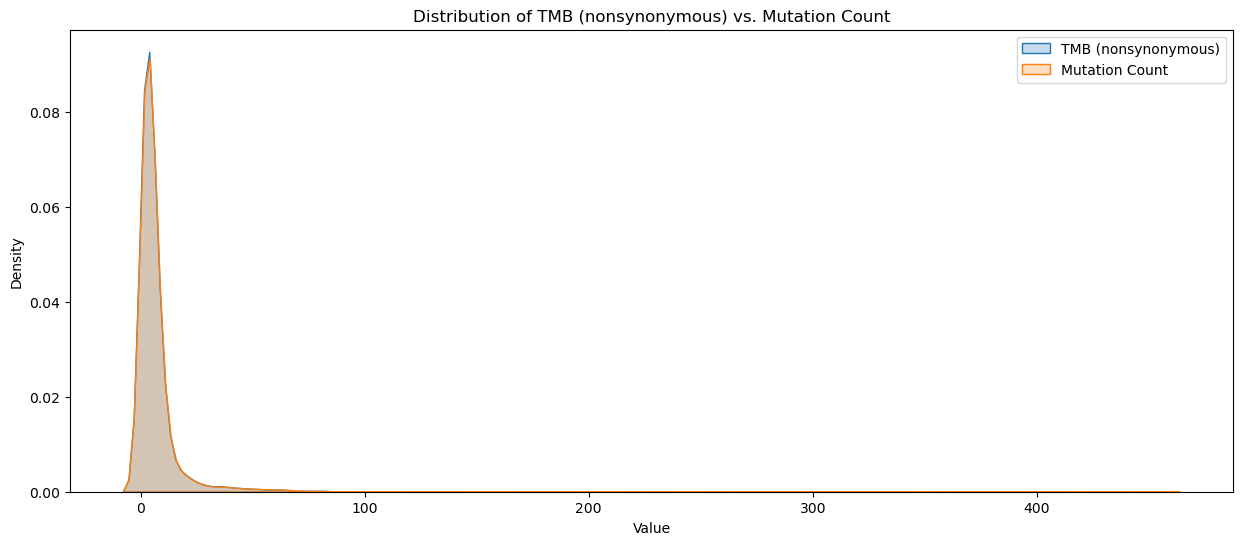

In [22]:
# Set up the figure
plt.figure(figsize=(15, 6))

# Plot the distribution for TMB (nonsynonymous)
sns.kdeplot(data['TMB (nonsynonymous)'], label='TMB (nonsynonymous)', shade=True)

# Plot the distribution for Mutation Count
sns.kdeplot(data['Mutation Count'], label='Mutation Count', shade=True)

# Setting labels, title, and legend
plt.xlabel('Value')
plt.ylabel('Density')
plt.title('Distribution of TMB (nonsynonymous) vs. Mutation Count')
plt.legend()

# Display the plot
plt.show()


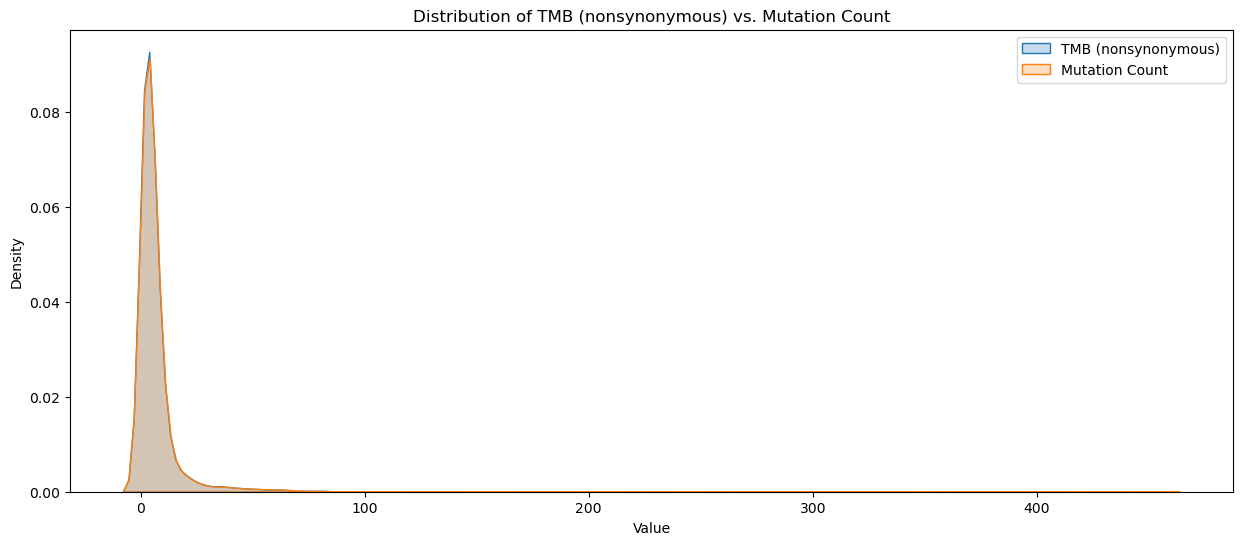

In [26]:
# Set up the figure
plt.figure(figsize=(15, 6))

# Plot the distribution for TMB (nonsynonymous)
sns.kdeplot(data['TMB (nonsynonymous)'], label='TMB (nonsynonymous)', fill=True)

# Plot the distribution for Mutation Count
sns.kdeplot(data['Mutation Count'], label='Mutation Count', fill=True)

# Setting labels, title, and legend
plt.xlabel('Value')
plt.ylabel('Density')
plt.title('Distribution of TMB (nonsynonymous) vs. Mutation Count')
plt.legend()

# Display the plot
plt.show()


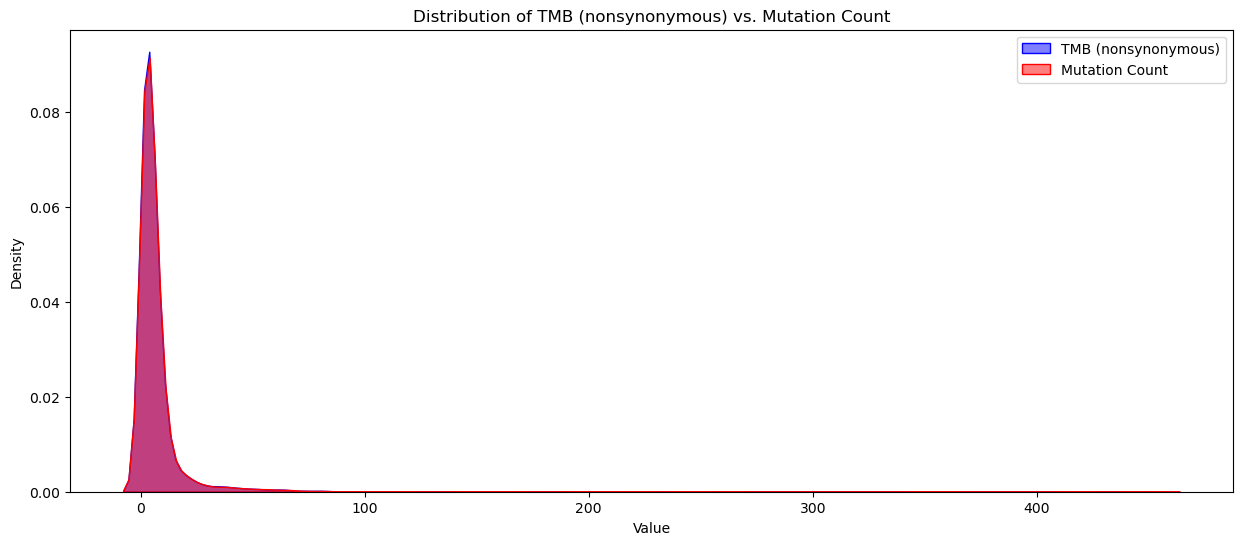

In [23]:
# Set up the figure
plt.figure(figsize=(15, 6))

# Plot the distribution for TMB (nonsynonymous) with blue color and transparency
sns.kdeplot(data['TMB (nonsynonymous)'], label='TMB (nonsynonymous)', fill=True, color='blue', alpha=0.5)

# Plot the distribution for Mutation Count with red color and transparency
sns.kdeplot(data['Mutation Count'], label='Mutation Count', fill=True, color='red', alpha=0.5)

# Setting labels, title, and legend
plt.xlabel('Value')
plt.ylabel('Density')
plt.title('Distribution of TMB (nonsynonymous) vs. Mutation Count')
plt.legend()

# Display the plot
plt.show()


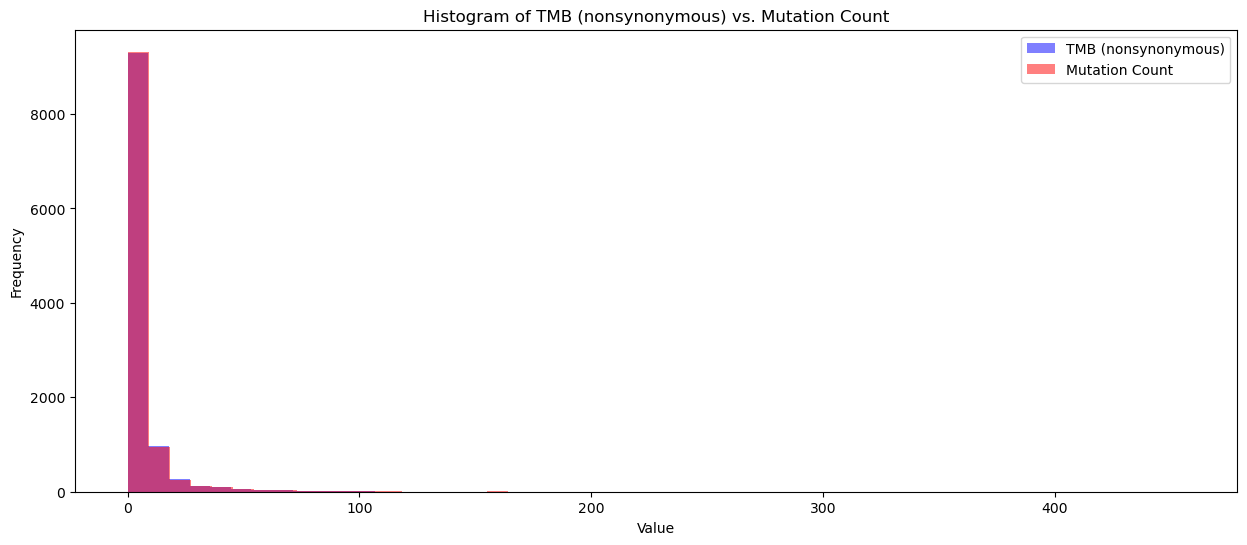

In [28]:
# Set up the figure
plt.figure(figsize=(15, 6))

# Plot the histogram for TMB (nonsynonymous) with blue color and transparency
plt.hist(data['TMB (nonsynonymous)'], label='TMB (nonsynonymous)', color='blue', alpha=0.5, bins=50)

# Plot the histogram for Mutation Count with red color and transparency
plt.hist(data['Mutation Count'], label='Mutation Count', color='red', alpha=0.5, bins=50)

# Setting labels, title, and legend
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of TMB (nonsynonymous) vs. Mutation Count')
plt.legend()

# Display the plot
plt.show()


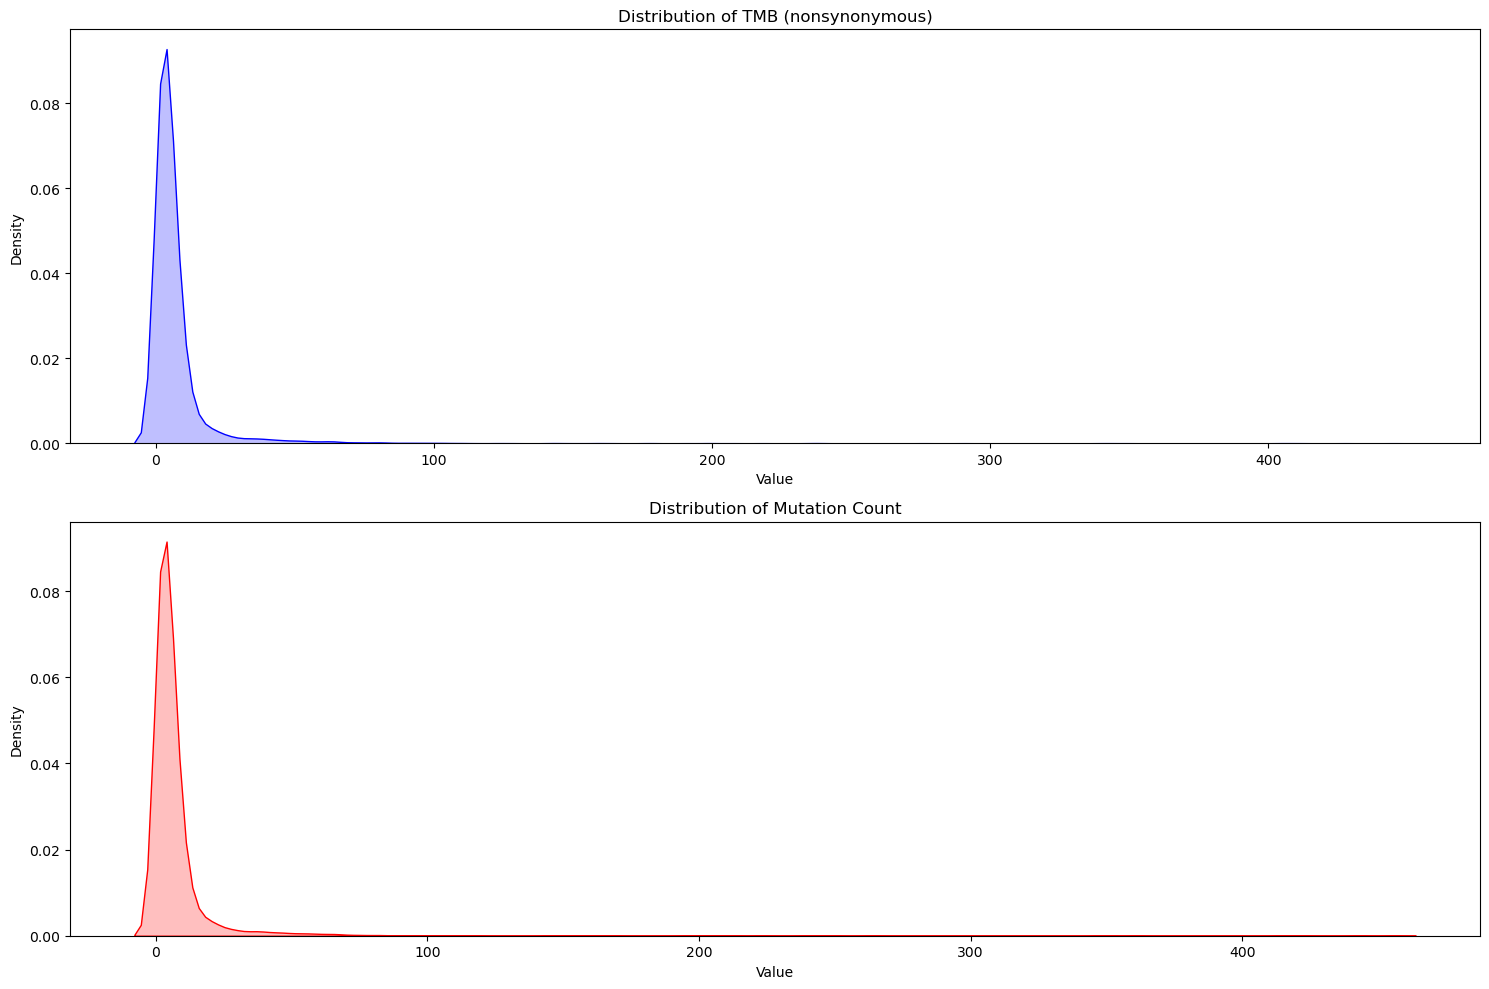

In [24]:
# Set up the figure and subplots
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(15, 10))

# Plot the distribution for TMB (nonsynonymous) in the first subplot
sns.kdeplot(data['TMB (nonsynonymous)'], ax=axes[0], fill=True, color='blue')
axes[0].set_title('Distribution of TMB (nonsynonymous)')
axes[0].set_xlabel('Value')
axes[0].set_ylabel('Density')

# Plot the distribution for Mutation Count in the second subplot
sns.kdeplot(data['Mutation Count'], ax=axes[1], fill=True, color='red')
axes[1].set_title('Distribution of Mutation Count')
axes[1].set_xlabel('Value')
axes[1].set_ylabel('Density')

# Adjust the layout and show the plots
plt.tight_layout()
plt.show()


### Random Forest

In [30]:
import pandas as pd
from catboost import CatBoostClassifier, Pool
from sklearn.model_selection import train_test_split

# Load the dataset
data = pd.read_csv("C:/Users/adler/TP53_NEW/merged_clinical_mutation_data.csv")

# Selecting the desired features
features_to_include = [
    'DNA Input', 'Fraction Genome Altered', 'Matched Status', 'Metastatic Site', 'Mutation Count', 
    'Oncotree Code', 'Overall Survival (Months)', 'Primary Tumor Site', 'Sample Class', 
    'Sample Collection Source', 'Sample coverage', 'Sample Type', 'Sex', 'Smoking History', 
    'Somatic Status', 'Specimen Type', 'TMB (nonsynonymous)', 'Tumor Purity', 
    "Patient's Vital Status", 'Cancer Type', 'NTRK1_Consolidated', 'BRCA2_Consolidated', 
    'CDKN2A_Consolidated', 'BRAF_Consolidated', 'ATM_Consolidated', 'MDM2_Consolidated', 
    'APC_Consolidated', 'KRAS_Consolidated', 'WT1_Consolidated', 'CDK12_Consolidated', 
    'JAK1_Consolidated', 'RET_Consolidated', 'PIK3CA_Consolidated'
]

# Replace NaN in categorical columns with "Unknown"
categorical_columns = ['Matched Status', 'Metastatic Site', 'Oncotree Code', 'Primary Tumor Site', 
                       'Sample Class', 'Sample Collection Source', 'Sample Type', 'Sex', 'Smoking History', 
                       'Somatic Status', 'Specimen Type', "Patient's Vital Status", 'Cancer Type']
for col in categorical_columns:
    data[col].fillna('Unknown', inplace=True)

# Extract features and target
X = data[features_to_include]
y = data['TP53_Consolidated']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the model
model = CatBoostClassifier(iterations=500, depth=10, learning_rate=0.05, loss_function='Logloss', cat_features=categorical_columns)

# Train the model
model.fit(X_train, y_train, verbose=0)

# Get feature importances
feature_importances = model.get_feature_importance()

# Create a DataFrame for the importances and sort by importance
importance_df = pd.DataFrame({
    'Feature': features_to_include,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

print(importance_df)


                      Feature  Importance
5               Oncotree Code   11.355601
16        TMB (nonsynonymous)    8.853657
1     Fraction Genome Altered    8.363784
19                Cancer Type    7.771948
6   Overall Survival (Months)    6.471096
7          Primary Tumor Site    6.221636
10            Sample coverage    5.910501
13            Smoking History    5.583014
17               Tumor Purity    5.318980
18     Patient's Vital Status    5.042337
3             Metastatic Site    5.038135
4              Mutation Count    4.638827
15              Specimen Type    3.861940
27          KRAS_Consolidated    2.897225
12                        Sex    1.891505
25          MDM2_Consolidated    1.635293
32        PIK3CA_Consolidated    1.521505
9    Sample Collection Source    1.445143
24           ATM_Consolidated    1.318340
22        CDKN2A_Consolidated    1.281073
0                   DNA Input    0.881086
29         CDK12_Consolidated    0.555537
11                Sample Type    0

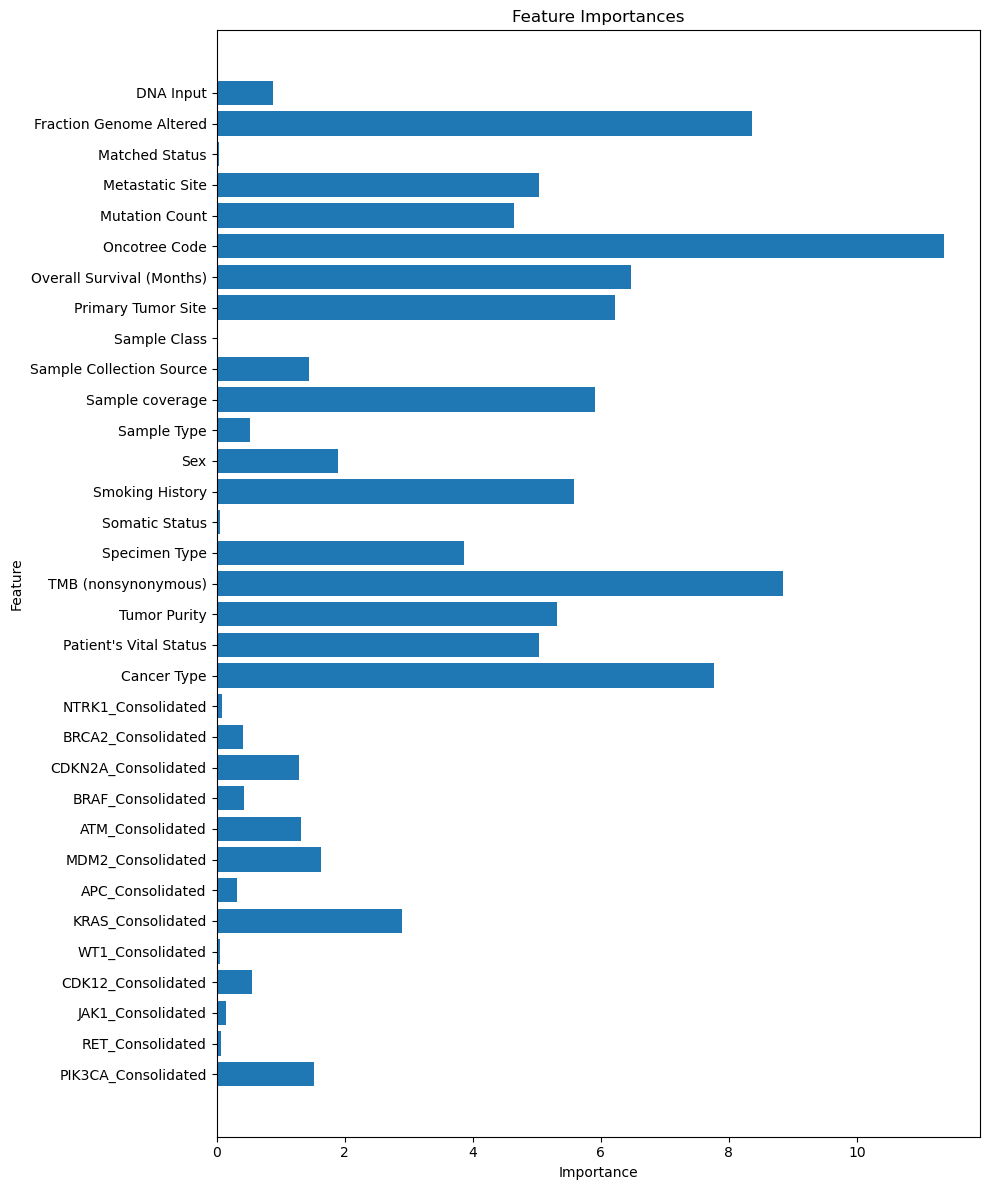

In [31]:
import matplotlib.pyplot as plt

# Extract features and importances from the dataframe
features = importance_df['Feature']
importances = importance_df['Importance']

# Sort the features based on importance
sorted_idx = importances.argsort()

# Plot
plt.figure(figsize=(10, 12))
plt.barh(features[sorted_idx], importances[sorted_idx])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances')
plt.tight_layout()
plt.show()


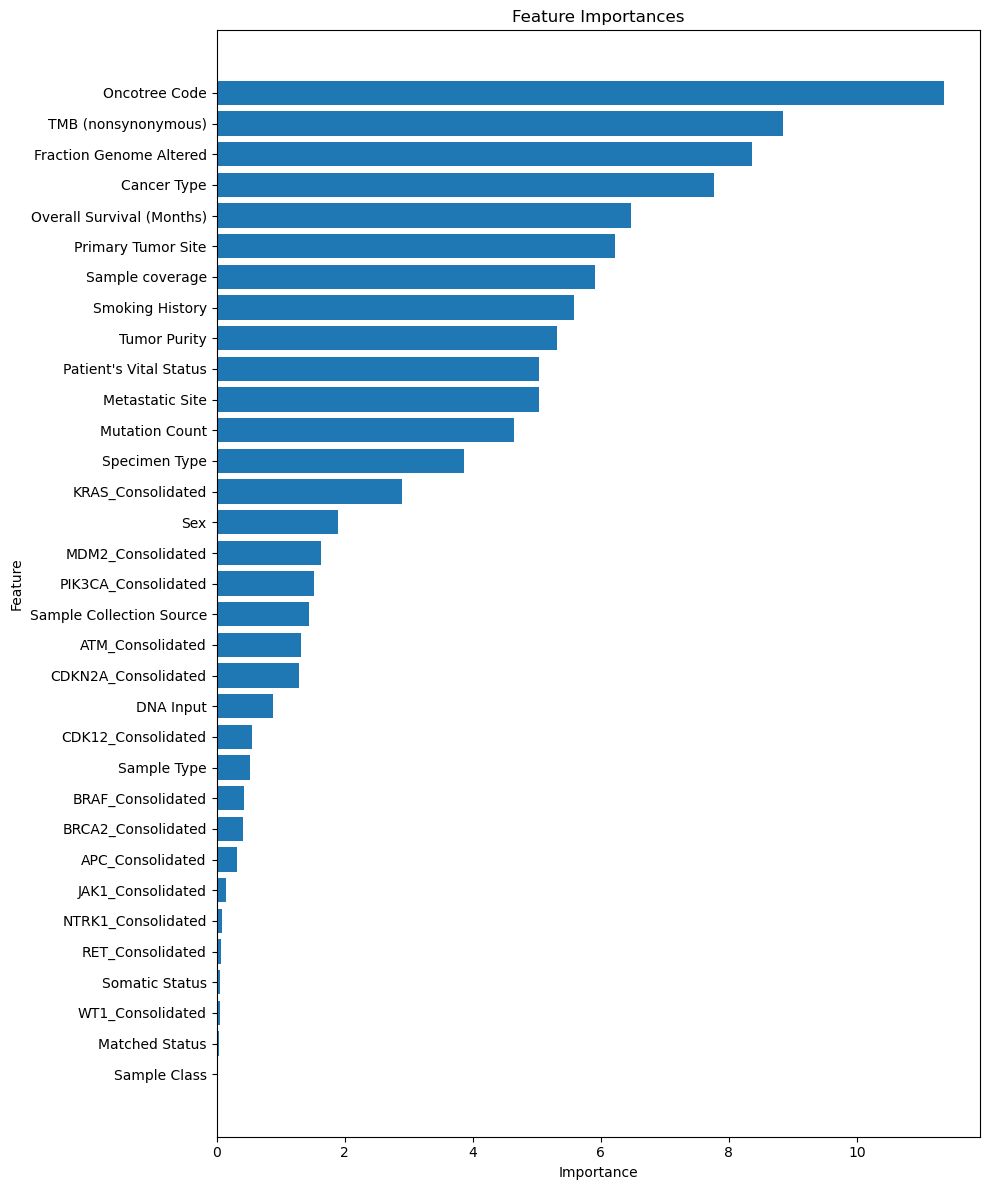

In [46]:
import matplotlib.pyplot as plt

# Sort the dataframe by importance in descending order
sorted_importance_df = importance_df.sort_values(by='Importance', ascending=True)

# Plot
plt.figure(figsize=(10, 12))
plt.barh(sorted_importance_df['Feature'], sorted_importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances')
plt.tight_layout()
plt.show()


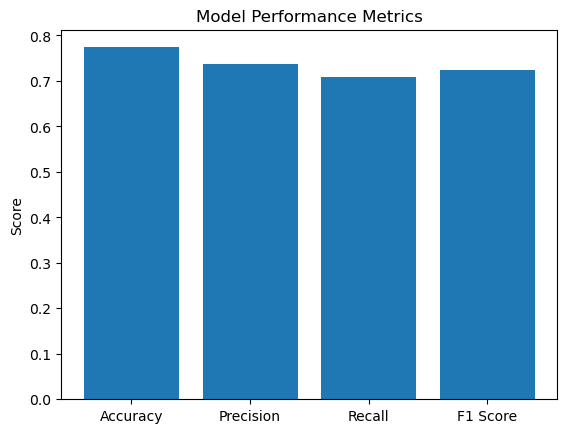

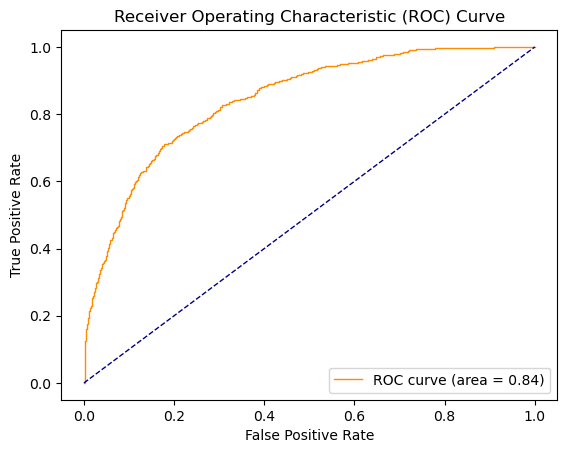

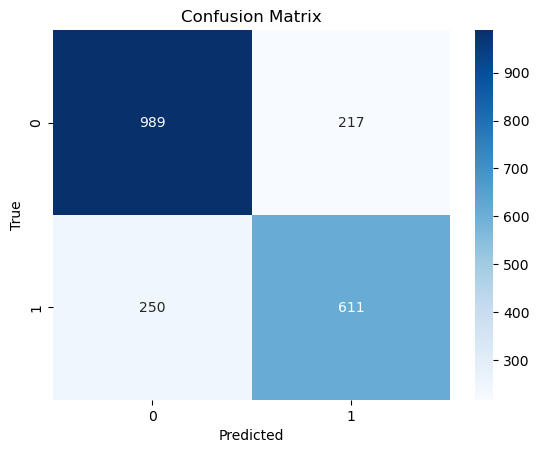

In [33]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, auc, confusion_matrix
import seaborn as sns

# 1. Model Performance Metrics
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]  # Probabilities for the positive class

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

metrics = [accuracy, precision, recall, f1]
metric_names = ['Accuracy', 'Precision', 'Recall', 'F1 Score']

plt.bar(metric_names, metrics)
plt.ylabel('Score')
plt.title('Model Performance Metrics')
plt.show()

# 2. ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# 3. Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


In [34]:
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Predict on the test data
y_pred = model.predict(X_test)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Create a DataFrame
metrics_df = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score'],
    'Score': [accuracy, precision, recall, f1]
})

print(metrics_df)


      Metric     Score
0   Accuracy  0.774069
1  Precision  0.773106
2     Recall  0.774069
3   F1 Score  0.773386


In [40]:
# Example: Misclassified instances
predictions = model.predict(X_test)
misclassified = X_test[(predictions != y_test).values]


### Display a sample of misclassified instances



In [44]:
print("Sample misclassified instances:")
print(misclassified.head())


Sample misclassified instances:
      DNA Input  Fraction Genome Altered Matched Status Metastatic Site  \
562       250.0                   0.1491        Matched      Lymph Node   
7106      250.0                   0.1220        Matched     Soft Tissue   
8281      250.0                   0.0000        Matched   No Metastasis   
1183      250.0                   0.1455        Matched   No Metastasis   
6948      158.5                   0.5557        Matched           Liver   

      Mutation Count Oncotree Code  Overall Survival (Months)  \
562               12          COAD                      40.40   
7106               3           IDC                      11.44   
8281               2          PAAD                       7.66   
1183               4          LUAD                      12.72   
6948               6          ACYC                      10.49   

        Primary Tumor Site Sample Class Sample Collection Source  ...  \
562                  Cecum        Tumor              

### Count of misclassified instances

In [42]:

print("Total misclassified instances: {}".format(len(misclassified)))


Total misclassified instances: 467


### Visualizing Misclassified Instances

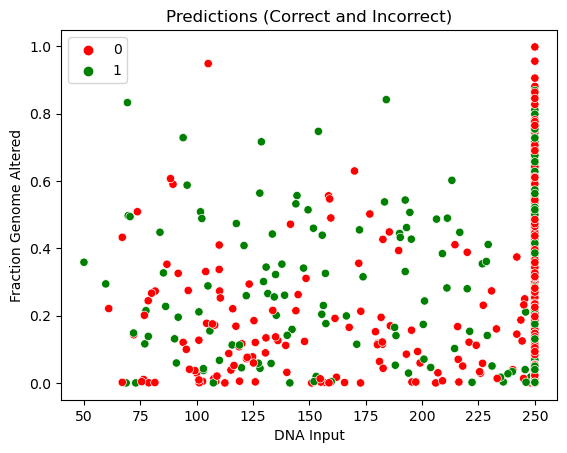

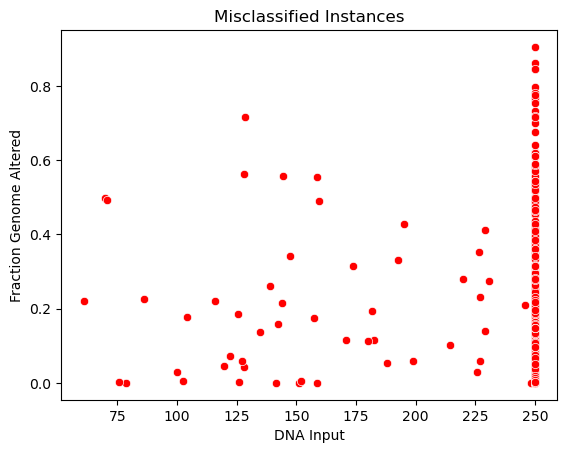

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming a binary classification and 2D dataset for visualization
sns.scatterplot(x=X_test.iloc[:,0], y=X_test.iloc[:,1], hue=predictions, palette=['red','green'])
plt.title("Predictions (Correct and Incorrect)")
plt.show()

sns.scatterplot(x=misclassified.iloc[:,0], y=misclassified.iloc[:,1], color='red')
plt.title("Misclassified Instances")
plt.show()


### Analyzing commonalities among misclassified instances



In [45]:
print("Average values among misclassified instances:")
print(misclassified.mean())

Average values among misclassified instances:
DNA Input                    239.805006
Fraction Genome Altered        0.208360
Mutation Count                 9.139186
Overall Survival (Months)     16.640385
Sample coverage              738.623126
TMB (nonsynonymous)            8.999223
Tumor Purity                  44.057816
NTRK1_Consolidated             0.029979
BRCA2_Consolidated             0.070664
CDKN2A_Consolidated            0.137045
BRAF_Consolidated              0.074946
ATM_Consolidated               0.053533
MDM2_Consolidated              0.032120
APC_Consolidated               0.104925
KRAS_Consolidated              0.216274
WT1_Consolidated               0.012848
CDK12_Consolidated             0.047109
JAK1_Consolidated              0.029979
RET_Consolidated               0.027837
PIK3CA_Consolidated            0.177730
dtype: float64


C:\Users\adler\AppData\Local\Temp\ipykernel_11612\1716744438.py:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(misclassified.mean())


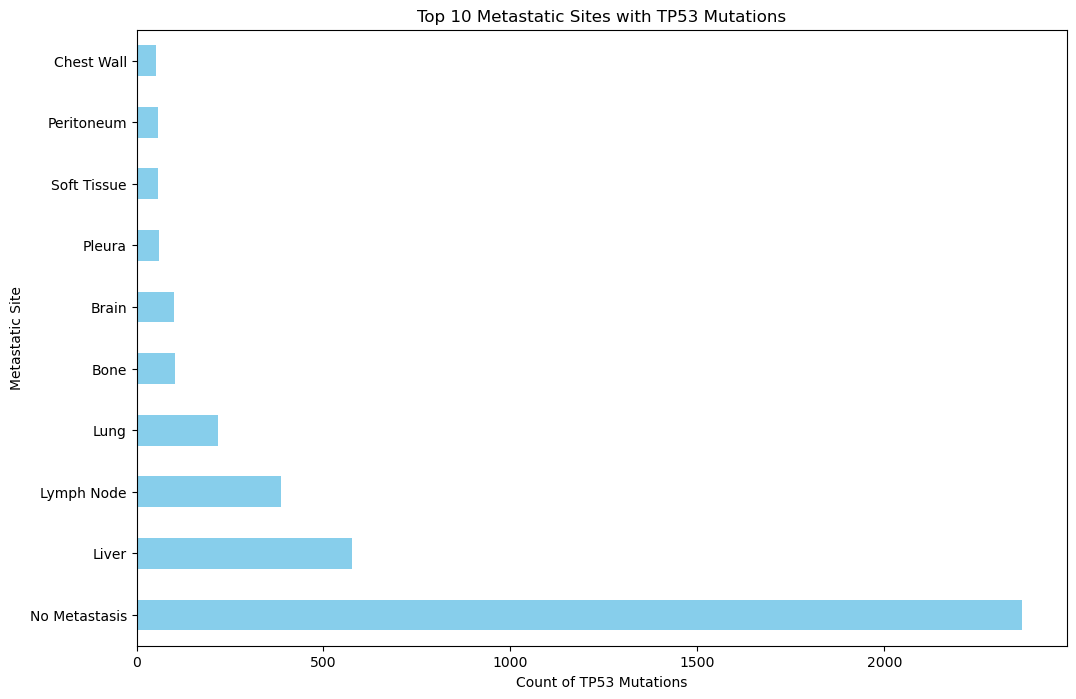

In [35]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv("C:/Users/adler/TP53_NEW/merged_clinical_mutation_data.csv")

# Filter data where TP53_Consolidated is 1
tp53_mutations_data = data[data['TP53_Consolidated'] == 1]

# Count the occurrences of each metastatic site
metastatic_site_counts = tp53_mutations_data['Metastatic Site'].value_counts()

# Get the top 10 metastatic sites with the most TP53 mutations
top_10_metastatic_sites = metastatic_site_counts.head(10)

# Plot
plt.figure(figsize=(12, 8))
top_10_metastatic_sites.plot(kind='barh', color='skyblue')
plt.title('Top 10 Metastatic Sites with TP53 Mutations')
plt.xlabel('Count of TP53 Mutations')
plt.ylabel('Metastatic Site')
plt.show()


In [37]:
print(data['Metastatic Site'].unique())


['No Metastasis' 'Liver' 'Lung' 'Peritoneum' 'Pelvis' 'Lymph Node'
 'Omentum' 'Parasternal Mass' 'Cervix' 'Rectosigmoid Colon' 'Brain'
 'Kidney' 'Diaphragm' 'Ovary' 'Chest Wall' 'Bone' 'Abdomen' 'Small Bowel'
 'Spleen' 'Stomach' 'Pleura' 'Retroperitoneum' 'Neck'
 'Subcutaneous Tissue' 'Bowel' 'Mediastinum' 'Orbital Floor' 'Muscle'
 'Uterus' 'Skin' 'Colon' 'Larynx' 'Vagina' 'Soft Tissue' 'Rectum'
 'Adrenal Gland' 'Scalp' 'Trachea' 'Tongue' 'Orbit' 'Heart'
 'Lymph Node, Non-Regional' 'Bladder' 'Spine' 'Lymph Node, Regional'
 'Urethra' 'Forehead' 'Axilla' 'Pancreas' 'In-transit' 'Sigmoid Colon'
 'Prostate' 'Appendix' 'Breast' 'Flank' 'Paracaval' 'Cecum'
 'Paracolic Gutter' 'Umbilical Cord' 'Thigh' 'Cul-de-sac' 'Pleural Fluid'
 'Blood Vessel' 'Epidural' 'Sacral Mass' 'Vas deferens' 'Upper Extremity'
 'Hip' 'Esophagus' 'Fallopian Tube' 'Mesentery' 'Eye' 'Umbilical Area'
 'Pterygoid Palatine Tissue' 'Left floor of oral cavity' 'Testis'
 'Perigastric nodules' 'Unknown' 'Colonic serosa' 'Parat

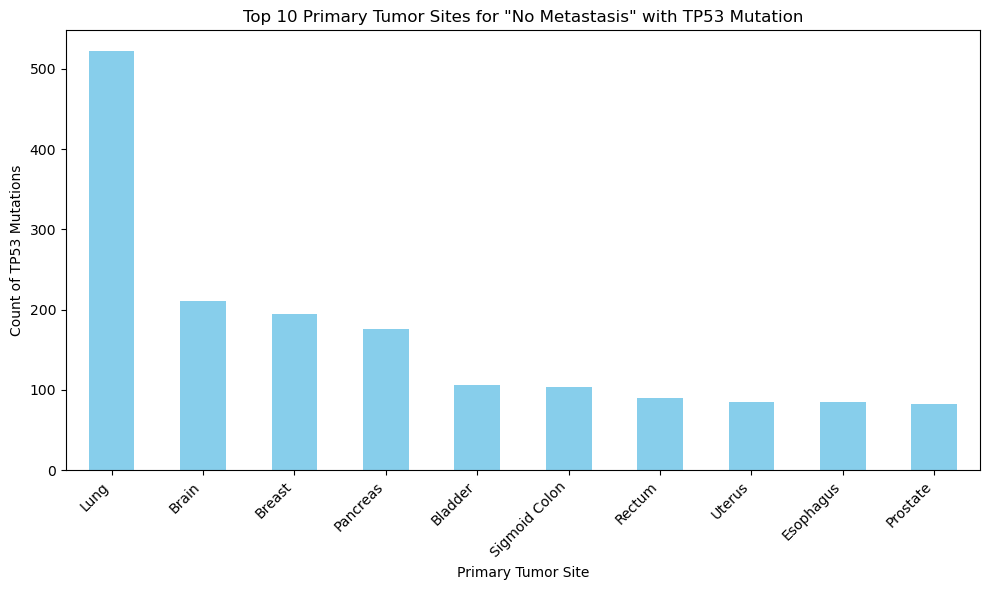

In [38]:
# Filtering the data for rows with 'No Metastasis' in 'Metastatic Site' and TP53 mutation
no_metastasis_data = data[(data['Metastatic Site'] == 'No Metastasis') & (data['TP53_Consolidated'] == 1)]

# Getting counts of each primary tumor site for the filtered data
primary_tumor_counts = no_metastasis_data['Primary Tumor Site'].value_counts().head(10)

# Plotting
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
primary_tumor_counts.plot(kind='bar', color='skyblue')
plt.title('Top 10 Primary Tumor Sites for "No Metastasis" with TP53 Mutation')
plt.xlabel('Primary Tumor Site')
plt.ylabel('Count of TP53 Mutations')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [21]:
import pandas as pd

# Load the dataset
data_path = "C:/Users/adler/TP53_NEW/merged_clinical_mutation_data.csv"
data = pd.read_csv(data_path)

# Display summary statistics for numerical columns
numerical_summary = data.describe()

# Display summary statistics for non-numerical (categorical) columns
categorical_summary = data.describe(include='object')

print("Numerical Summary:\n", numerical_summary)
print("\nCategorical Summary:\n", categorical_summary)


Numerical Summary:
           DNA Input  Fraction Genome Altered  Mutation Count  \
count  10335.000000             10331.000000    10335.000000   
mean     238.713097                 0.195007        7.289405   
std       36.067467                 0.188985       17.243768   
min       50.000000                 0.000000        0.000000   
25%      250.000000                 0.036600        2.000000   
50%      250.000000                 0.145900        4.000000   
75%      250.000000                 0.295900        7.000000   
max      250.000000                 1.000000      456.000000   

       Overall Survival (Months)  Sample coverage  TMB (nonsynonymous)  \
count               10334.000000     10335.000000         10335.000000   
mean                   17.695032       718.290663             7.192387   
std                    13.174194       266.251647            17.071146   
min                     0.000000        48.000000             0.000000   
25%                     7.967500 

In [22]:
import pandas as pd

# Load the dataset
data_path = "C:/Users/adler/TP53_NEW/merged_clinical_mutation_data.csv"
data = pd.read_csv(data_path)

# Compute the distribution of the 'TP53_Consolidated' column
tp53_distribution = data['TP53_Consolidated'].value_counts(normalize=True)
print(tp53_distribution)


0    0.570779
1    0.429221
Name: TP53_Consolidated, dtype: float64


In [23]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, auc, confusion_matrix
import seaborn as sns

# Load the dataset
path = "C:\\Users\\adler\\TP53_NEW\\merged_clinical_mutation_data.csv"
data = pd.read_csv(path)

# Display the first few rows of the dataset to ensure it's loaded correctly
data.head()


,Patientid,Cancer Type,Cancer Type Detailed,DNA Input,Fraction Genome Altered,Matched Status,Metastatic Site,Mutation Count,Oncotree Code,Overall Survival (Months),...,ATM_Consolidated,MDM2_Consolidated,APC_Consolidated,KRAS_Consolidated,WT1_Consolidated,TP53_Consolidated,CDK12_Consolidated,JAK1_Consolidated,RET_Consolidated,PIK3CA_Consolidated
0,P-0000004,Breast Cancer,Breast Invasive Ductal Carcinoma,250.0,0.2782,Matched,No Metastasis,16,IDC,40.40,...,0,0,0,0,0,1,0,0,0,0
1,P-0000015,Breast Cancer,Breast Invasive Ductal Carcinoma,198.0,0.3503,Matched,Liver,7,IDC,9.07,...,0,0,0,0,0,1,0,0,0,1
2,P-0000023,Mesothelioma,Peritoneal Mesothelioma,250.0,0.1596,Matched,No Metastasis,5,PEMESO,8.71,...,0,0,0,0,0,0,0,0,0,0
3,P-0000024,Endometrial Cancer,Uterine Endometrioid Carcinoma,250.0,0.3878,Matched,Lung,6,UEC,36.75,...,0,0,0,0,0,0,0,0,0,0
4,P-0000025,Endometrial Cancer,Uterine Serous Carcinoma/Uterine Papillary Ser...,250.0,0.1020,Matched,Peritoneum,2,USC,8.81,...,0,0,0,0,0,1,0,0,0,1


In [25]:
# Predict on the training data
y_train_pred = model.predict(X_train)

# Calculate metrics
train_accuracy = accuracy_score(y_train, y_train_pred)
train_precision = precision_score(y_train, y_train_pred, average='weighted')
train_recall = recall_score(y_train, y_train_pred, average='weighted')
train_f1 = f1_score(y_train, y_train_pred, average='weighted')

# Create a DataFrame
train_metrics_df = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score'],
    'Score': [train_accuracy, train_precision, train_recall, train_f1]
})

print(train_metrics_df)


      Metric     Score
0   Accuracy  0.922593
1  Precision  0.922727
2     Recall  0.922593
3   F1 Score  0.922389


In [26]:
# Predict the probabilities for class 1 (TP53 mutation)
probabilities = model.predict_proba(X_test)[:, 1]

# Create a new DataFrame from X_test to append the probabilities
X_test_with_probs = X_test.copy()
X_test_with_probs["TP53_Mutation_Probability"] = probabilities

# Display the first few rows of the DataFrame with probabilities
print(X_test_with_probs.head())


      DNA Input  Fraction Genome Altered Matched Status Metastatic Site  \
7153      250.0                   0.0004        Matched            Lung   
9142      250.0                   0.0546        Matched   No Metastasis   
765       250.0                   0.1322        Matched   Adrenal Gland   
4871      250.0                   0.2288        Matched   No Metastasis   
562       250.0                   0.1491        Matched      Lymph Node   

      Mutation Count Oncotree Code  Overall Survival (Months)  \
7153               4         CCRCC                      12.33   
9142               3           GBM                      10.98   
765               11          LUSC                      14.66   
4871               0          DDLS                       9.07   
562               12          COAD                      40.40   

     Primary Tumor Site Sample Class Sample Collection Source  ...  \
7153             Kidney        Tumor                  Outside  ...   
9142              

##### cross validation

In [31]:
from sklearn.model_selection import cross_val_score

# Parameters
n_folds = 5

# Cross-validation
cv_scores = cross_val_score(model, X_train, y_train, cv=n_folds, scoring='accuracy', verbose=0)

# Calculate mean and standard deviation
cv_mean = cv_scores.mean()
cv_std = cv_scores.std()

print(f"Mean CV Accuracy: {cv_mean:.4f}")
print(f"Standard Deviation of CV Accuracy: {cv_std:.4f}")


0:	learn: 0.6784149	total: 134ms	remaining: 1m 7s
1:	learn: 0.6640028	total: 251ms	remaining: 1m 2s
2:	learn: 0.6495105	total: 354ms	remaining: 58.6s
3:	learn: 0.6375494	total: 463ms	remaining: 57.4s
4:	learn: 0.6207182	total: 555ms	remaining: 55s
5:	learn: 0.6095184	total: 655ms	remaining: 53.9s
6:	learn: 0.5972634	total: 758ms	remaining: 53.4s
7:	learn: 0.5863476	total: 850ms	remaining: 52.3s
8:	learn: 0.5777366	total: 998ms	remaining: 54.5s
9:	learn: 0.5690027	total: 1.11s	remaining: 54.4s
10:	learn: 0.5622925	total: 1.2s	remaining: 53.2s
11:	learn: 0.5548326	total: 1.3s	remaining: 53.1s
12:	learn: 0.5506582	total: 1.34s	remaining: 50.2s
13:	learn: 0.5447834	total: 1.45s	remaining: 50.2s
14:	learn: 0.5397183	total: 1.56s	remaining: 50.5s
15:	learn: 0.5320359	total: 1.67s	remaining: 50.6s
16:	learn: 0.5275902	total: 1.77s	remaining: 50.3s
17:	learn: 0.5219872	total: 1.89s	remaining: 50.6s
18:	learn: 0.5207119	total: 1.92s	remaining: 48.7s
19:	learn: 0.5170213	total: 2.03s	remaining: 

In [29]:
model_final = CatBoostClassifier(iterations=500, depth=10, learning_rate=0.05, loss_function='Logloss', cat_features=categorical_columns)
model_final.fit(X_train, y_train, verbose=0)


In [30]:
y_test_pred = model_final.predict(X_test)
y_test_prob = model_final.predict_proba(X_test)[:, 1]



In [32]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

test_accuracy = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred)
test_recall = recall_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred)
test_auc = roc_auc_score(y_test, y_test_prob)

print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Test Precision: {test_precision:.4f}")
print(f"Test Recall: {test_recall:.4f}")
print(f"Test F1 Score: {test_f1:.4f}")
print(f"Test AUC: {test_auc:.4f}")


Test Accuracy: 0.7741
Test Precision: 0.7379
Test Recall: 0.7096
Test F1 Score: 0.7235
Test AUC: 0.8439


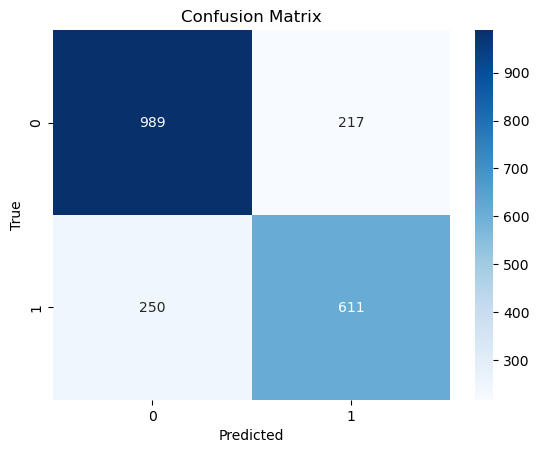

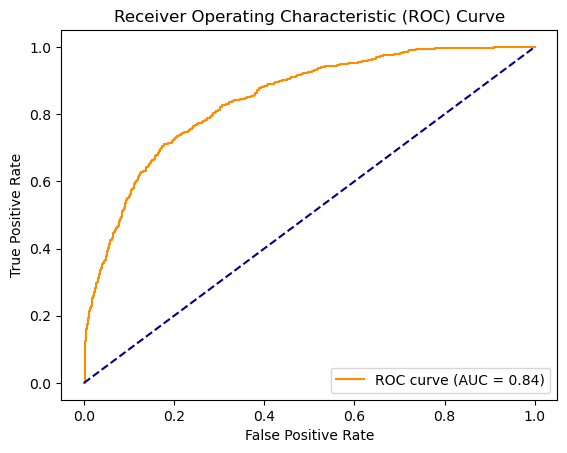

In [33]:
from sklearn.metrics import confusion_matrix, roc_curve, auc
import seaborn as sns
import matplotlib.pyplot as plt

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_test_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_test_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


### XG Boost

In [12]:
pip install xgboost


  Obtaining dependency information for xgboost from https://files.pythonhosted.org/packages/32/10/4689bda37403f7dd029d550c4446e0097c2f33b8ae877b235e76d5c49bc2/xgboost-2.0.0-py3-none-win_amd64.whl.metadata
   ---------------------------------------- 0.0/99.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/99.7 MB 1.3 MB/s eta 0:01:18
   ---------------------------------------- 0.1/99.7 MB 1.6 MB/s eta 0:01:02
   ---------------------------------------- 0.2/99.7 MB 1.5 MB/s eta 0:01:07
   ---------------------------------------- 0.2/99.7 MB 1.4 MB/s eta 0:01:09
   ---------------------------------------- 0.3/99.7 MB 1.5 MB/s eta 0:01:06
   ---------------------------------------- 0.4/99.7 MB 1.6 MB/s eta 0:01:04
   ---------------------------------------- 0.5/99.7 MB 1.5 MB/s eta 0:01:06
   ---------------------------------------- 0.5/99.7 MB 1.5 MB/s eta 0:01:08
   ---------------------------------------- 0.6/99.7 MB 1.5 MB/s eta 0:01:05
   -----------------------------

In [68]:
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.preprocessing import LabelEncoder

# Load the dataset
data = pd.read_csv("C:/Users/adler/TP53_NEW/merged_clinical_mutation_data.csv")

# Selected features
features_to_include = [
    'DNA Input', 'Fraction Genome Altered', 'Matched Status', 'Metastatic Site', 'Mutation Count', 
    'Oncotree Code', 'Overall Survival (Months)', 'Primary Tumor Site', 'Sample Class', 
    'Sample Collection Source', 'Sample coverage', 'Sample Type', 'Sex', 'Smoking History', 
    'Somatic Status', 'Specimen Type', 'TMB (nonsynonymous)', 'Tumor Purity', 
    "Patient's Vital Status", 'Cancer Type', 'NTRK1_Consolidated', 'BRCA2_Consolidated', 
    'CDKN2A_Consolidated', 'BRAF_Consolidated', 'ATM_Consolidated', 'MDM2_Consolidated', 
    'APC_Consolidated', 'KRAS_Consolidated', 'WT1_Consolidated', 'CDK12_Consolidated', 
    'JAK1_Consolidated', 'RET_Consolidated', 'PIK3CA_Consolidated'
]

# Replace NaN in categorical columns with "Unknown"
categorical_columns = ['Matched Status', 'Metastatic Site', 'Oncotree Code', 'Primary Tumor Site', 
                       'Sample Class', 'Sample Collection Source', 'Sample Type', 'Sex', 'Smoking History', 
                       'Somatic Status', 'Specimen Type', "Patient's Vital Status", 'Cancer Type']
for col in categorical_columns:
    data[col].fillna('Unknown', inplace=True)

# Label encode categorical columns
label_encoders = {}
for col in categorical_columns:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

# Define features and target
features = data[features_to_include]
target = data['TP53_Consolidated']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Initialize and train the XGBoost model
model = XGBClassifier()
model.fit(X_train, y_train)

# Predict on test data
y_pred = model.predict(X_test)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"ROC AUC: {roc_auc:.4f}")



Accuracy: 0.7552
Precision: 0.7047
Recall: 0.7096
F1 Score: 0.7072
ROC AUC: 0.7487


In [69]:
# Predict on training data
y_train_pred = model.predict(X_train)

# Calculate metrics for training data
train_accuracy = accuracy_score(y_train, y_train_pred)
train_precision = precision_score(y_train, y_train_pred)
train_recall = recall_score(y_train, y_train_pred)
train_f1 = f1_score(y_train, y_train_pred)
train_roc_auc = roc_auc_score(y_train, y_train_pred)

print("Training Data Metrics:")
print(f"Accuracy: {train_accuracy:.4f}")
print(f"Precision: {train_precision:.4f}")
print(f"Recall: {train_recall:.4f}")
print(f"F1 Score: {train_f1:.4f}")
print(f"ROC AUC: {train_roc_auc:.4f}")


Training Data Metrics:
Accuracy: 0.9421
Precision: 0.9385
Recall: 0.9267
F1 Score: 0.9326
ROC AUC: 0.9402


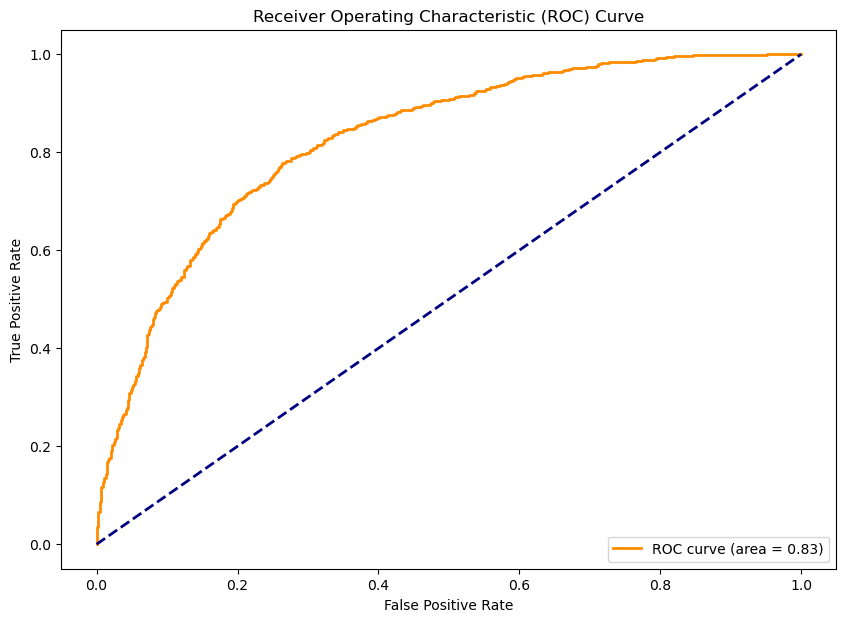

In [70]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Predict the probabilities of the test data
y_prob = model.predict_proba(X_test)[:,1]

# Compute ROC curve and ROC area
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10,7))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


In [71]:
from sklearn.metrics import roc_auc_score

# Recalculate AUC
recalculated_auc = roc_auc_score(y_test, y_prob)
print("Recalculated AUC:", recalculated_auc)


Recalculated AUC: 0.8268885922690073


In [72]:
# Metrics for training data
y_train_pred = model.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
train_precision = precision_score(y_train, y_train_pred)
train_recall = recall_score(y_train, y_train_pred)
train_f1 = f1_score(y_train, y_train_pred)

# Metrics for test data
y_pred = model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred)
test_precision = precision_score(y_test, y_pred)
test_recall = recall_score(y_test, y_pred)
test_f1 = f1_score(y_test, y_pred)

print("Training Data Metrics:")
print(f"Accuracy: {train_accuracy:.4f}")
print(f"Precision: {train_precision:.4f}")
print(f"Recall: {train_recall:.4f}")
print(f"F1 Score: {train_f1:.4f}")

print("\nTest Data Metrics:")
print(f"Accuracy: {test_accuracy:.4f}")
print(f"Precision: {test_precision:.4f}")
print(f"Recall: {test_recall:.4f}")
print(f"F1 Score: {test_f1:.4f}")


Training Data Metrics:
Accuracy: 0.9421
Precision: 0.9385
Recall: 0.9267
F1 Score: 0.9326

Test Data Metrics:
Accuracy: 0.7552
Precision: 0.7047
Recall: 0.7096
F1 Score: 0.7072


#### Regularization

In [73]:
model = XGBClassifier(
    reg_alpha=0.1,       # L1 regularization
    reg_lambda=1,       # L2 regularization
    learning_rate=0.1,  # Step size shrinkage to prevent overfitting
    n_estimators=100,   # Number of boosting rounds
    max_depth=3         # Maximum depth of a tree
)


In [74]:
# Initialize and train the XGBoost model with regularization
model = XGBClassifier(
    learning_rate=0.01,
    n_estimators=1000,
    max_depth=5,
    min_child_weight=1,
    gamma=0,
    subsample=0.8,
    colsample_bytree=0.8,
    reg_alpha=0.005,  # L1 regularization
    reg_lambda=1,     # L2 regularization
    objective='binary:logistic',
    nthread=4,
    scale_pos_weight=1,
    seed=42
)

model.fit(X_train, y_train)

# Predict on test data
y_pred = model.predict(X_test)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

print(f"Test Data Metrics after Regularization:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"ROC AUC: {roc_auc:.4f}")


Test Data Metrics after Regularization:
Accuracy: 0.7586
Precision: 0.7150
Recall: 0.6992
F1 Score: 0.7070
ROC AUC: 0.7501


#### Hyperparameter Tuning using GridSearchCV

In [75]:
from sklearn.model_selection import GridSearchCV

# Define the hyperparameters and their possible values
param_grid = {
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 4, 5, 6],
    'n_estimators': [100, 200, 300]
}

# Initialize XGBoost classifier
xgb_classifier = XGBClassifier()

# Setup the GridSearchCV
grid_search = GridSearchCV(xgb_classifier, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_

print("Best hyperparameters:")
print(best_params)

# Evaluate the model with best hyperparameters
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy with best hyperparameters: {accuracy:.4f}")


Best hyperparameters:
{'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 300}
Test Accuracy with best hyperparameters: 0.7629


In [76]:
from sklearn.metrics import precision_score

# Predict on the test data using the best model
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Calculate precision
precision = precision_score(y_test, y_pred)

print(f"Test Precision with best hyperparameters: {precision:.4f}")


Test Precision with best hyperparameters: 0.7211


### NEURAL NETWORK


In [5]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Embedding, Flatten, Dense, Concatenate
from tensorflow.keras.models import Model

# Input layers for categorical columns
input_layers = []
embedding_layers = []
for col in categorical_columns:
    unique_vals = int(data[col].nunique())
    embedding_dim = int(min(np.ceil(unique_vals / 2), 50))
    input_layer = Input(shape=(1,))
    embedding_layer = Embedding(input_dim=unique_vals, output_dim=embedding_dim, name=col+'_embedding')(input_layer)
    input_layers.append(input_layer)
    embedding_layers.append(embedding_layer)

# Input layer for numerical columns
numerical_input = Input(shape=(len(numerical_cols),))
input_layers.append(numerical_input)
flatten_layer = Flatten()(numerical_input)
embedding_layers.append(flatten_layer)

# Concatenate embedding layers
concat_layer = Concatenate()(embedding_layers)

# Dense layers
dense1 = Dense(128, activation='relu')(concat_layer)
output = Dense(1, activation='sigmoid')(dense1)

model = Model(inputs=input_layers, outputs=output)
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Prepare input data for the model
X_train_list = [X_train[col] for col in categorical_columns] + [X_train[numerical_cols]]
X_test_list = [X_test[col] for col in categorical_columns] + [X_test[numerical_cols]]

# Train the model
model.fit(X_train_list, y_train, epochs=10, batch_size=32, validation_data=(X_test_list, y_test))


ModuleNotFoundError: No module named 'tensorflow'

In [ ]:
!pip install tensorflow


In [4]:
features_to_include = [
    'DNA Input', 'Fraction Genome Altered', 'Matched Status', 'Metastatic Site', 'Mutation Count', 
    'Oncotree Code', 'Overall Survival (Months)', 'Primary Tumor Site', 'Sample Class', 
    'Sample Collection Source', 'Sample coverage', 'Sample Type', 'Sex', 'Smoking History', 
    'Somatic Status', 'Specimen Type', 'TMB (nonsynonymous)', 'Tumor Purity', 
    "Patient's Vital Status", 'Cancer Type', 'NTRK1_Consolidated', 'BRCA2_Consolidated', 
    'CDKN2A_Consolidated', 'BRAF_Consolidated', 'ATM_Consolidated', 'MDM2_Consolidated', 
    'APC_Consolidated', 'KRAS_Consolidated', 'WT1_Consolidated', 'CDK12_Consolidated', 
    'JAK1_Consolidated', 'RET_Consolidated', 'PIK3CA_Consolidated'
]


In [1]:
!pip install tensorflow

  Obtaining dependency information for tensorflow from https://files.pythonhosted.org/packages/9e/b8/ed5f794359d05cd0bffb894c6418da87b93016ee17b669d55c45d1bd5d5b/tensorflow-2.13.0-cp311-cp311-win_amd64.whl.metadata
  Using cached tensorflow-2.13.0-cp311-cp311-win_amd64.whl.metadata (2.6 kB)
  Obtaining dependency information for tensorflow-intel==2.13.0 from https://files.pythonhosted.org/packages/2f/2f/3c84f675931ce3bcbc7e23acbba1e5d7f05ce769adab48322de57a9f5928/tensorflow_intel-2.13.0-cp311-cp311-win_amd64.whl.metadata
  Using cached tensorflow_intel-2.13.0-cp311-cp311-win_amd64.whl.metadata (4.1 kB)
  Obtaining dependency information for absl-py>=1.0.0 from https://files.pythonhosted.org/packages/01/e4/dc0a1dcc4e74e08d7abedab278c795eef54a224363bb18f5692f416d834f/absl_py-2.0.0-py3-none-any.whl.metadata
  Using cached absl_py-2.0.0-py3-none-any.whl.metadata (2.3 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
  Obtaining dependency information for flatbuffers>=23.1.21

In [6]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

# Load the dataset
data = pd.read_csv("C:/Users/adler/TP53_NEW/merged_clinical_mutation_data.csv")

# Replace NaN in categorical columns with "Unknown"
categorical_columns = ['Matched Status', 'Metastatic Site', 'Oncotree Code', 'Primary Tumor Site', 
                       'Sample Class', 'Sample Collection Source', 'Sample Type', 'Sex', 'Smoking History', 
                       'Somatic Status', 'Specimen Type', "Patient's Vital Status", 'Cancer Type']
for col in categorical_columns:
    data[col].fillna('Unknown', inplace=True)

# Convert categorical columns to integer values
label_encoders = {}
for col in categorical_columns:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

# Split the data
X = data[features_to_include]
y = data['TP53_Consolidated']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale numerical features
numerical_cols = list(set(features_to_include) - set(categorical_columns))
scaler = MinMaxScaler()
X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])


In [7]:
import re


In [44]:
input_layers = []
embedding_layers = []

for col in categorical_columns:
    unique_vals = int(data[col].nunique())
    embedding_dim = int(min(np.ceil(unique_vals / 2), 50))
    input_layer = Input(shape=(1,))
    # Fixing the layer naming convention by replacing spaces, single quotes, and other special characters with underscores
    sanitized_col_name = re.sub(r"[^A-Za-z0-9]", "_", col)
    embedding_layer_name = sanitized_col_name + '_embedding'
    embedding_layer = Embedding(input_dim=unique_vals, output_dim=embedding_dim, name=embedding_layer_name)(input_layer)
    input_layers.append(input_layer)
    embedding_layers.append(embedding_layer)


In [45]:
# Combine the embeddings
concatenate_embeddings = Concatenate()(embedding_layers)

# Dense layers
dense_layer_1 = Dense(128, activation='relu')(concatenate_embeddings)
dense_layer_2 = Dense(64, activation='relu')(dense_layer_1)
dense_layer_3 = Dense(32, activation='relu')(dense_layer_2)
output_layer = Dense(1, activation='sigmoid')(dense_layer_3)

# Create and compile the model
model = Model(inputs=input_layers, outputs=output_layer)
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Convert the training and testing data to lists
X_train_list = [X_train[col].values for col in categorical_columns]
X_test_list = [X_test[col].values for col in categorical_columns]

# Train the model
model.fit(X_train_list, y_train, epochs=10, batch_size=512, validation_data=(X_test_list, y_test))

# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test_list, y_test)
print(f"Test Accuracy: {test_accuracy:.4f}")


Epoch 1/10
17/17 [==============================] - 2s 21ms/step - loss: 0.6739 - accuracy: 0.5855 - val_loss: 0.6414 - val_accuracy: 0.6333
Epoch 2/10
17/17 [==============================] - 0s 5ms/step - loss: 0.6079 - accuracy: 0.6820 - val_loss: 0.5740 - val_accuracy: 0.7083
Epoch 3/10
17/17 [==============================] - 0s 5ms/step - loss: 0.5472 - accuracy: 0.7138 - val_loss: 0.5580 - val_accuracy: 0.7107
Epoch 4/10
17/17 [==============================] - 0s 5ms/step - loss: 0.5255 - accuracy: 0.7280 - val_loss: 0.5550 - val_accuracy: 0.7102
Epoch 5/10
17/17 [==============================] - 0s 6ms/step - loss: 0.5157 - accuracy: 0.7270 - val_loss: 0.5587 - val_accuracy: 0.6991
Epoch 6/10
17/17 [==============================] - 0s 6ms/step - loss: 0.5080 - accuracy: 0.7363 - val_loss: 0.5602 - val_accuracy: 0.7126
Epoch 7/10
17/17 [==============================] - 0s 5ms/step - loss: 0.5024 - accuracy: 0.7384 - val_loss: 0.5609 - val_accuracy: 0.7150
Epoch 8/10
17/17 [=

In [47]:
from sklearn.metrics import precision_score

# 1. Make predictions
y_pred_probs = model.predict(X_test_list)

# 2. Convert predictions to binary format
y_pred = (y_pred_probs > 0.5).astype(int).flatten()

# 3. Compute precision
precision = precision_score(y_test, y_pred)
print(f"Test Precision: {precision:.4f}")


65/65 [==============================] - 0s 1ms/step
Test Precision: 0.6544
